# 1. **Título**
### Previsão de Inadimplência de Crédito: **Análise e Modelagem de Risco**

# 2. Sobre o projeto

Neste projeto, analisamos um conjunto de dados de clientes de uma instituição financeira para identificar os fatores que contribuem para a inadimplência. Nosso objetivo é criar um modelo preditivo que ajude a instituição a identificar clientes em risco de inadimplência e tomar medidas preventivas.

# 3. Importando bibliotecas

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 4. Carregando dataset de crédido

In [24]:
df = pd.read_csv('/kaggle/input/base-de-dados/Python_M10_support material.csv', na_values = "na")
df.head(10)

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,"12.691,51","1.144,90",42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,"8.256,96","1.291,45",33
2,713982108,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,"3.418,56","1.887,72",20
3,769911858,0,40,F,4,ensino medio,NaN,menos que $40K,blue,34,3,1,4,"3.313,03","1.171,56",20
4,709106358,0,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,"4.716,22","816,08",28
5,713061558,0,44,M,2,mestrado,casado,$40K - $60K,blue,36,3,2,1,"4.010,69","1.088,07",24
6,810347208,0,51,M,4,NaN,casado,$120K +,gold,46,6,3,1,"34.516,72","1.330,87",31
7,818906208,0,32,M,0,ensino medio,NaN,$60K - $80K,silver,27,2,2,2,"29.081,49","1.538,32",36
8,710930508,0,37,M,3,sem educacao formal,solteiro,$60K - $80K,blue,36,5,0,2,"22.352,50","1.350,14",24
9,719661558,0,48,M,2,mestrado,solteiro,$80K - $120K,blue,36,6,3,3,"11.656,41","1.441,73",32


# 5. Etapa de exploração de dados

### 5.1 estruturação dos dados
verificando a estrutura dos dados

In [25]:
print(df.shape)
print(df.dtypes)

(10127, 16)
id                          int64
default                     int64
idade                       int64
sexo                       object
dependentes                 int64
escolaridade               object
estado_civil               object
salario_anual              object
tipo_cartao                object
meses_de_relacionamento     int64
qtd_produtos                int64
iteracoes_12m               int64
meses_inativo_12m           int64
limite_credito             object
valor_transacoes_12m       object
qtd_transacoes_12m          int64
dtype: object


### 5.2 Analise descritiva
verificando a proporção de clientes adimplenstes e inadimplentes, onde a coluna **'default'** nos indica a adimplencia ou inadimplencia de um cliente sedo **"default = 0"** clientes adimplentes e **"default = 1"** cliente inadimplente 

In [26]:
total_clientes , _ = df.shape # tupla do nosso dataframe
clientes_adimplentes , _ = df[df['default'] == 0].shape # tupla de clientes adimplentes 
clientes_inadimplentes , _ = df[df['default'] == 1].shape # tupla de clientes inadimpletes

print(f'Proporção de clientes adimplentes {round(clientes_adimplentes / total_clientes * 100, 2)}%')
print(f'Proporção de clientes inadimplentes {round(clientes_inadimplentes / total_clientes * 100, 2)}%')

Proporção de clientes adimplentes 83.93%
Proporção de clientes inadimplentes 16.07%


> Já podemos perceber que na nossa base de dados o número dos nossos clientes inadimplentes é cerca de de 5 vezes menor que os clientes adimplentes.

### 5.3 Dados faltantes
Aqui iremos verificar as colunas com dados faltantes, e conseguimos visualizar que sas colunas: "escolaridade", "estado_civil", "salario_anual" existe ausência de dados.

In [27]:
df.isna().any()

id                         False
default                    False
idade                      False
sexo                       False
dependentes                False
escolaridade                True
estado_civil                True
salario_anual               True
tipo_cartao                False
meses_de_relacionamento    False
qtd_produtos               False
iteracoes_12m              False
meses_inativo_12m          False
limite_credito             False
valor_transacoes_12m       False
qtd_transacoes_12m         False
dtype: bool

#### Atravez das função abaixo podemos ferificar algumas estatisticas dos dados faltantes:

In [1]:
def proporcao_dados_faltantes(df: pd.DataFrame) -> None:
    status_dados_faltantes = []
    for colun in df.columns:
        if df[colun].isna().any():
            qtd = df[df[colun].isna()].shape[0]
            total = df.shape[0]
            dict_proporcao = {colun:{'Quantidade': qtd, 'Porcentagem': round(qtd / total * 100 , 2)}}
            status_dados_faltantes.append(dict_proporcao)
            
    for start in status_dados_faltantes:
        print(start)

NameError: name 'pd' is not defined

In [29]:
# proporção de dados faltantes total do data frame
proporcao_dados_faltantes(df = df)

{'escolaridade': {'Quantidade': 1519, 'Porcentagem': 15.0}}
{'estado_civil': {'Quantidade': 749, 'Porcentagem': 7.4}}
{'salario_anual': {'Quantidade': 1112, 'Porcentagem': 10.98}}


In [30]:
# proporção de dados faltantes entre os clientes adimplentes
proporcao_dados_faltantes(df = df[df['default'] == 0])

{'escolaridade': {'Quantidade': 1263, 'Porcentagem': 14.86}}
{'estado_civil': {'Quantidade': 620, 'Porcentagem': 7.29}}
{'salario_anual': {'Quantidade': 925, 'Porcentagem': 10.88}}


In [31]:
# proporção de dados faltantes entre os clientes inadimplentes
proporcao_dados_faltantes(df = df[df['default'] == 1])

{'escolaridade': {'Quantidade': 256, 'Porcentagem': 15.73}}
{'estado_civil': {'Quantidade': 129, 'Porcentagem': 7.93}}
{'salario_anual': {'Quantidade': 187, 'Porcentagem': 11.49}}


> Conseguimos verificar que a proporção de dados faltantes tanto dos clientes adimplentes, quanto clientes inadimplentes, não orcila tanto quando comparado a quantidade de dados faltantes total, isso significa que ainda se fossemos excluir as linhas com dados faltantes, isso não iria ter um impacto tão grande no nosso dateset devido a proporção ser similar.

# 6. Transformação e limpeza de dados

Aqui nós iremos corrigir o schema e remover os dados faltantes

In [32]:
df.dtypes

id                          int64
default                     int64
idade                       int64
sexo                       object
dependentes                 int64
escolaridade               object
estado_civil               object
salario_anual              object
tipo_cartao                object
meses_de_relacionamento     int64
qtd_produtos                int64
iteracoes_12m               int64
meses_inativo_12m           int64
limite_credito             object
valor_transacoes_12m       object
qtd_transacoes_12m          int64
dtype: object

> coseguimos analizar que no nosso dataframe existem algumas colunas que deveriam ser 'number' mas são 'object'como é o caso de 'limite_credito' e 'valor_transacoes_12m'

In [33]:
df[['limite_credito' , 'valor_transacoes_12m']] # visualizar colunas

,limite_credito,valor_transacoes_12m
0,"12.691,51","1.144,90"
1,"8.256,96","1.291,45"
2,"3.418,56","1.887,72"
3,"3.313,03","1.171,56"
4,"4.716,22","816,08"
...,...,...
10122,"4.003,91","15.476,26"
10123,"4.277,04","8.764,88"
10124,"5.409,16","10.291,78"
10125,"5.281,84","8.395,62"


> cosequimos ver que as duas colunas precisarão ser formatadas para possamos transforma-las em um tipo float, 5.281,84 -> 5281.84 

### 6.1 correção do schema

In [34]:
df['limite_credito'] = df['limite_credito'].apply(lambda x : float(x.replace('.','').replace(',','.')))
df['valor_transacoes_12m'] = df['valor_transacoes_12m'].apply(lambda x : float(x.replace('.','').replace(',','.')))

### 6.2 Dropando dados nulos

In [35]:
df.dropna(inplace = True) # excluindo as linhas com dados faltantes, em seguidad vamos ver o impacto que isso isso teve em nossa base de dados


In [36]:
novos_adimplentes = df[df['default'] == 0].shape[0]
novos_inadimplentes = df[df['default'] == 1].shape[0]
nova_qtd = df.shape[0]

print(f'Nova proporção de clientes adimplentes {round( novos_adimplentes / nova_qtd * 100 ,2)}')
print(f'proporçao original de clientes adimplentes {round( clientes_adimplentes / total_clientes * 100 ,2)}')
print(f'Nova proporção de clientes inadimplentes {round( novos_inadimplentes / nova_qtd * 100 ,2)}')
print(f'proporçao original de clientes inadimplentes {round( clientes_inadimplentes / total_clientes * 100 ,2)}')

Nova proporção de clientes adimplentes 84.28
proporçao original de clientes adimplentes 83.93
Nova proporção de clientes inadimplentes 15.72
proporçao original de clientes inadimplentes 16.07


> podemos verificar que a proporção do default permanasse bassicamente a mesma

# 7. Etapa de visualização de dados

In [37]:
df_adimplente = df[df['default'] == 0] 
df_inadimplente = df[df['default'] == 1] 

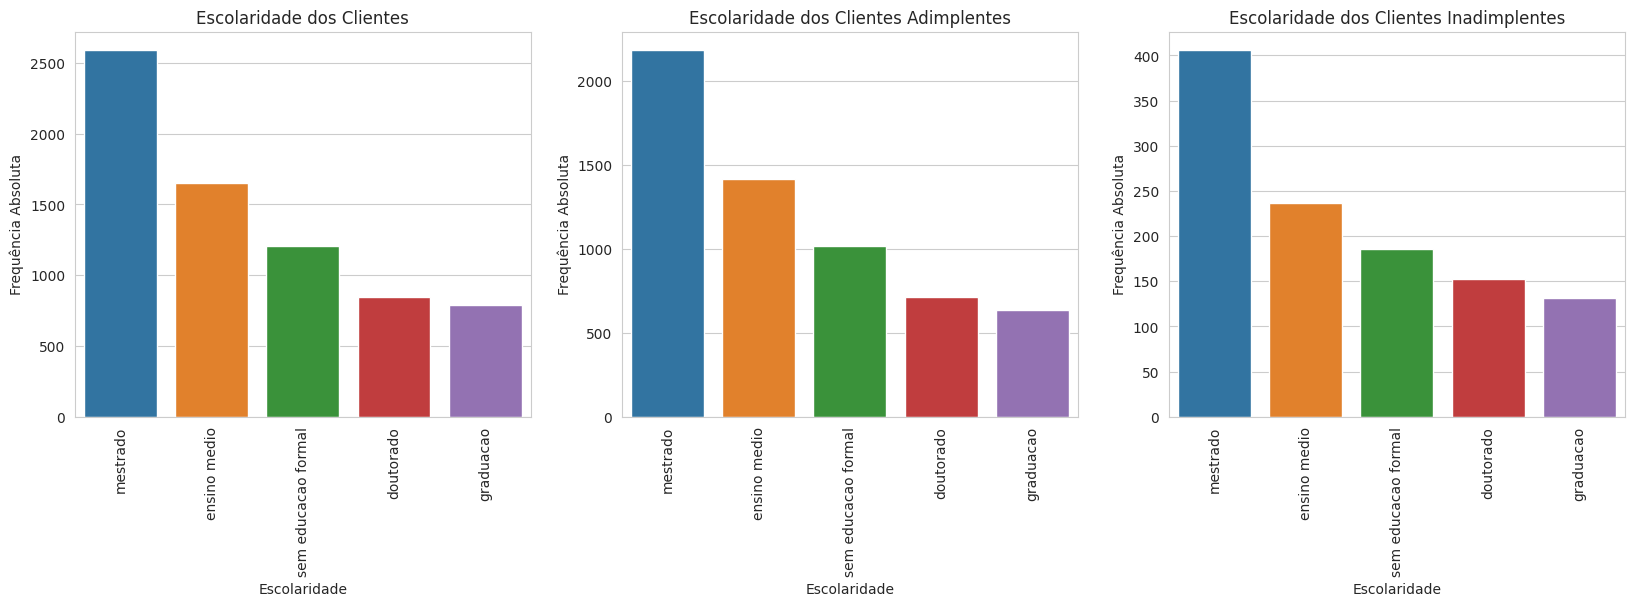

In [38]:
sns.set_style("whitegrid")
coluna = 'escolaridade'
titulos = ['Escolaridade dos Clientes', 'Escolaridade dos Clientes Adimplentes', 'Escolaridade dos Clientes Inadimplentes']

figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)
for eixo, dataframe in enumerate([df, df[df['default'] == 0], df[df['default'] == 1]]):
    sns.barplot(x=dataframe[coluna].value_counts().index, y=dataframe[coluna].value_counts().values, ax=eixos[eixo])
    eixos[eixo].set_title(titulos[eixo])
    eixos[eixo].set_xlabel(coluna.capitalize())
    eixos[eixo].set_ylabel('Frequência Absoluta')
    eixos[eixo].set_xticklabels(eixos[eixo].get_xticklabels(), rotation=90)
figura.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


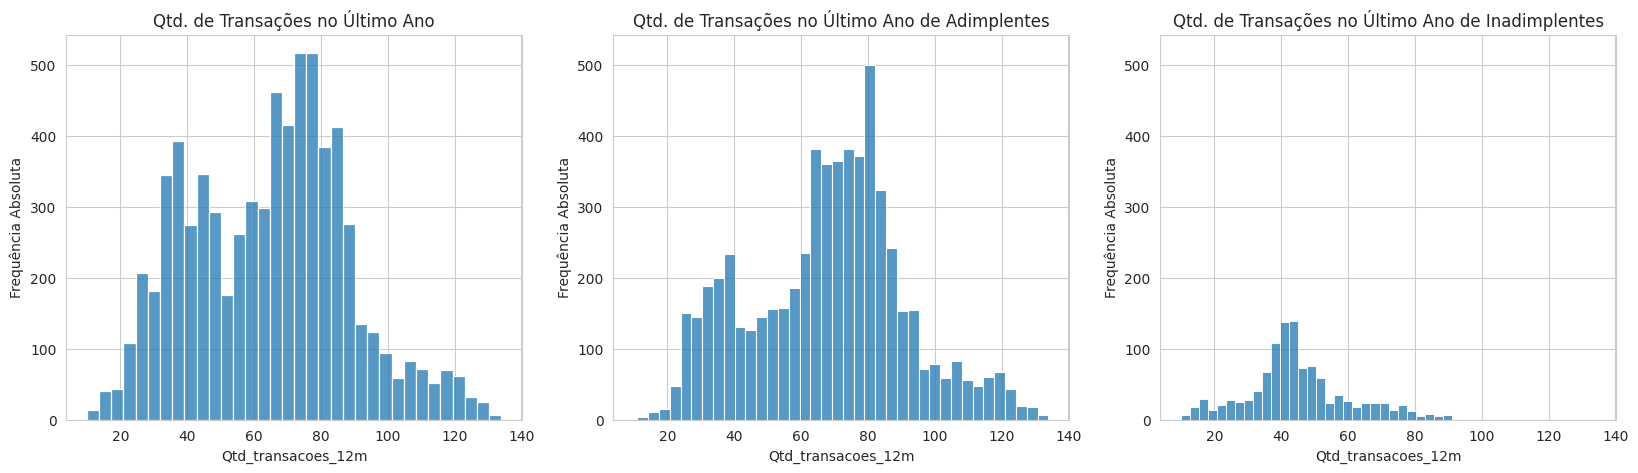

In [39]:
coluna = 'qtd_transacoes_12m'
titulos = ['Qtd. de Transações no Último Ano', 'Qtd. de Transações no Último Ano de Adimplentes', 'Qtd. de Transações no Último Ano de Inadimplentes']

eixo = 0
max_y = 0
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:

    f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[eixo])
    f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')

    _, max_y_f = f.get_ylim()
    max_y = max_y_f if max_y_f > max_y else max_y
    f.set(ylim=(0, max_y))
    eixo += 1

figura.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


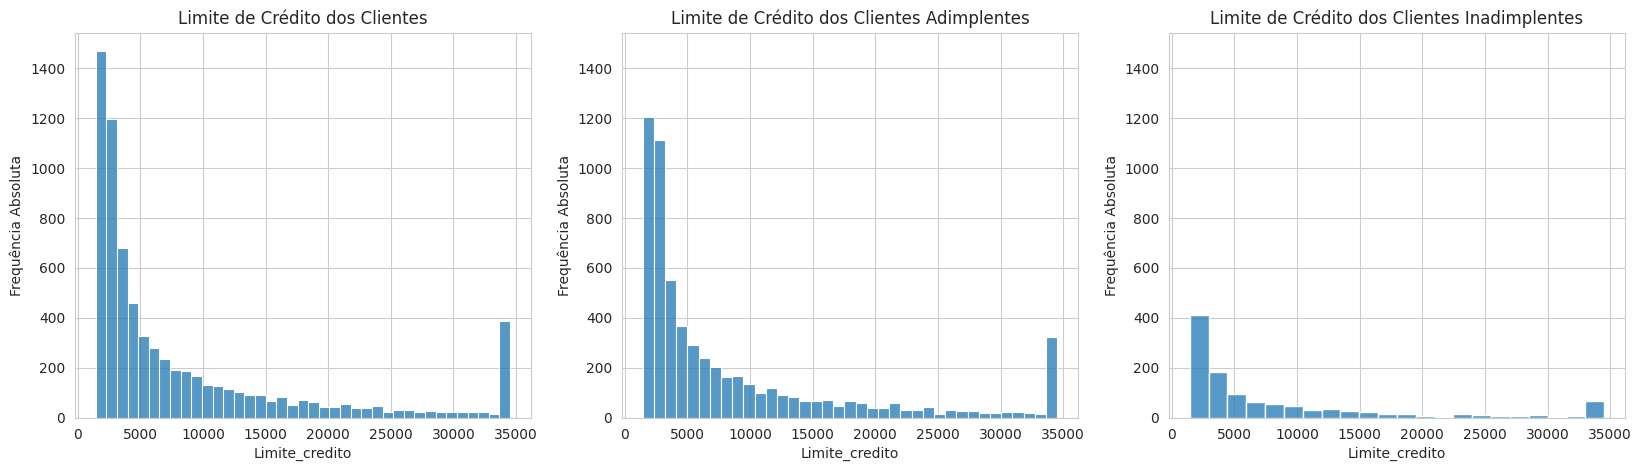

In [40]:
coluna = 'limite_credito'
titulos = ['Limite de Crédito dos Clientes', 'Limite de Crédito dos Clientes Adimplentes', 'Limite de Crédito dos Clientes Inadimplentes']

eixo = 0
max_y = 0
figura, eixos = plt.subplots(1, 3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:
    f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[eixo])
    f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')

    _, max_y_f = f.get_ylim()
    max_y = max_y_f if max_y_f > max_y else max_y
    f.set(ylim=(0, max_y))

    eixo += 1

figura.show()

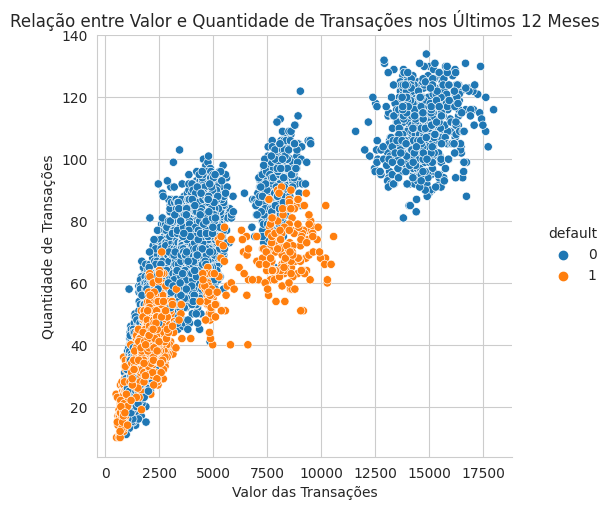

In [41]:
sns.relplot(x='valor_transacoes_12m', y='qtd_transacoes_12m', data=df, hue='default')
plt.title('Relação entre Valor e Quantidade de Transações nos Últimos 12 Meses')
plt.xlabel('Valor das Transações')
plt.ylabel('Quantidade de Transações')
plt.show()

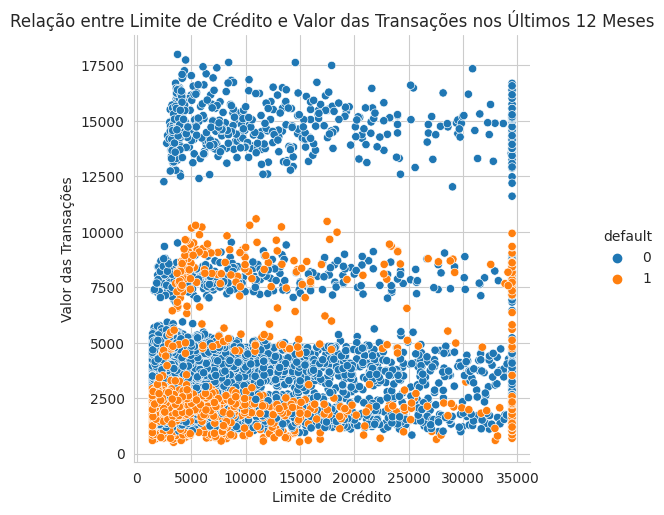

In [42]:
sns.relplot(x='limite_credito', y='valor_transacoes_12m', data=df, hue='default')
plt.title('Relação entre Limite de Crédito e Valor das Transações nos Últimos 12 Meses')
plt.xlabel('Limite de Crédito')
plt.ylabel('Valor das Transações')
plt.show()

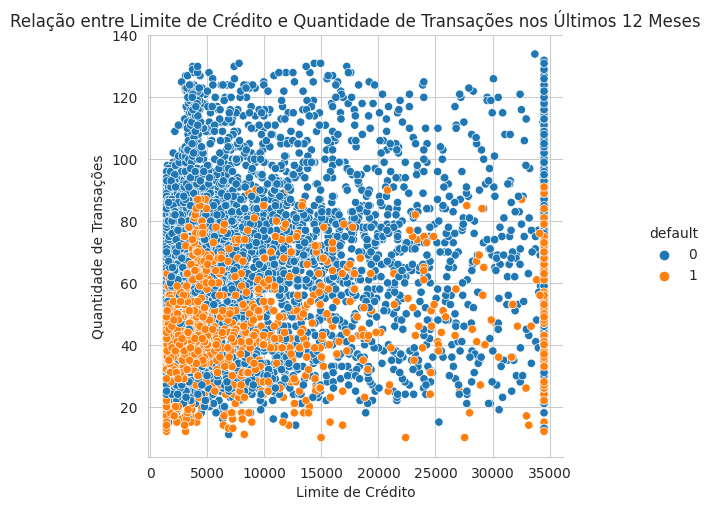

In [43]:
sns.relplot(x='limite_credito', y='qtd_transacoes_12m', data=df, hue='default')
plt.title('Relação entre Limite de Crédito e Quantidade de Transações nos Últimos 12 Meses')
plt.xlabel('Limite de Crédito')
plt.ylabel('Quantidade de Transações')
plt.show()

Conseguimos visualizar onde geralmente o default 0 ocorre e assim podemos tomar medidas prefentivas.